# FIAP IA para Dev
## Tech Challenge Fase 01 - Análise e Processamento


Esse notebook irá fornecer uma análise exploratória dos dados do dataset "[Lung Cancer Risk & Trends Across 25 Countries](https://www.kaggle.com/datasets/ankushpanday1/lung-cancer-risk-and-trends-across-25-countries/data)" de forma que possamos entender a viabilidade da construção de um modelo para prever a incidência de câncer de pulmão de acordo com características e hábitos das pessoas.

Vamos começar importando o dataset:

In [150]:
import pandas as pd

pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/lung_cancer_prediction_dataset.csv")

Agora vamos analisar a quantidade de linhas e colunas:

In [151]:
df.shape

(220632, 24)

Nesse primeiro momento conseguimos observar um total de `220632` registros e `24` colunas. Vamos ver uma amostra desses dados:

In [152]:
df.head(10)

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,No,NaN,0,Yes,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,No,NaN,0,Yes,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,No,NaN,0,Yes,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0
5,5,India,1380,54,Female,No,0,0,No,No,No,NaN,0,Yes,High,No,No,Poor,No,NaN,Developing,70000,1.95,0.0
6,6,Mexico,128,60,Female,No,0,0,No,Yes,No,NaN,0,Yes,Medium,No,No,Poor,No,NaN,Developing,28000,2.34,0.0
7,7,Iran,84,74,Female,No,0,0,Yes,No,No,NaN,0,No,Low,No,No,Poor,Yes,NaN,Developing,27000,1.12,0.0
8,8,Myanmar,54,32,Male,Yes,37,29,No,No,No,NaN,0,No,Low,No,Yes,Poor,No,NaN,Developing,21197,0.60,0.0
9,9,Ethiopia,120,29,Female,No,0,0,No,Yes,No,NaN,0,Yes,Medium,No,No,Poor,No,NaN,Developing,18000,0.71,0.0


Agora vamos ver o tipo de dado e a contagem de valores para cada coluna:

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

Observamos que algumas colunas possuem valores nulos. Além disso, as colunas `Population_Size`, `Healthcare_Access`, `Developed_or_Developing`, `Annual_Lung_Cancer_Deaths`, `Lung_Cancer_Prevalence_Rate` e `Mortality_Rate` aparentam conter resultado referente à região. Vamos agrupar por `Country` e entender melhor se elas pertencem à região:

In [154]:
df.groupby(df["Country"]).nunique()

,ID,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
Country,,,,,,,,,,,,,,,,,,,,,,,
Bangladesh,8821,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,352
Brazil,8800,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,338
China,8907,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,322
DR Congo,8861,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,343
Egypt,8822,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,345
Ethiopia,8975,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,379
France,8920,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,340
Germany,8727,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,311
India,8752,1,66,2,2,41,27,2,2,2,4,11,2,3,2,2,1,2,3,1,1,201,320


Podemos perceber que `Country` possui 25 registros únicos e, ao agrupar junto das colunas `Population_Size`, `Healthcare_Access` e `Developed_or_Developing` obtemos apenas 1 registro, indicando que esses valores são constantes no dataset para o país. A coluna `Annual_Lung_Cancer_Deaths` possui o mesmo comportamento de constância, com exceção para `Myanmar` podendo indicar algum tipo de problema nos dados fornecidos para esse país.

Agora vamos analisar a incidência de nulos abaixo:

In [155]:
df.isnull().sum()

ID                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

Embora o dataset possua `220632` registros, as colunas `Cancer_Stage` e `Treatment_Type` possuem menos de `10000` preenchidos, indicando a presença de valores nulos que deverão ser tratados durante a fase de preparação e limpeza dos dados. Vamos entender melhor quais valores essas colunas possuem?

In [156]:
df["Cancer_Stage"].value_counts(dropna=False)

Cancer_Stage
NaN        211671
Stage 4      2387
Stage 2      2198
Stage 1      2191
Stage 3      2185
Name: count, dtype: int64

In [157]:
df["Treatment_Type"].value_counts(dropna=False)

Treatment_Type
NaN             213968
Surgery           2272
Radiotherapy      2250
Chemotherapy      2142
Name: count, dtype: int64

Após explorar os valores nulos, prosseguimos com a observação dos dados e identificar a coluna `Lung_Cancer_Diagnosis` como `target` e as colunas abaixo como categóricas:

**Categóricas nominais**:

`Country`, `Gender`, `Smoker`, `Passive_Smoker`, `Family_History`, `Lung_Cancer_Diagnosis`, `Adenocarcinoma_Type`, `Occupational_Exposure`, `Indoor_Pollution`, `Healthcare_Access`, `Early_Detection`, `Treatment_Type` e `Developed_or_Developing`

**Categóricas ordinais**:

`Cancer_Stage` e `Air_Pollution_Exposure`

Vamos entender a distribuição de valores para a variável target:

In [158]:
df["Lung_Cancer_Diagnosis"].value_counts()

Lung_Cancer_Diagnosis
No     211671
Yes      8961
Name: count, dtype: int64

Temos uma distribuição muito desbalanceada para a variável, o que resultará em um modelo muito propenso a responder como negativo para uma doença. Durante a etapa de limpeza e preparo dos dados devemos utilizar técnicas de under e oversampling. Na escolha do modelo podemos optar por aqueles que trabalham com pesos diferentes por classe target.

Agora vamos entender a distribuição dos dados do dataset:

In [159]:
df.describe()

,ID,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,110315.500000,229.779882,52.518352,8.175274,7.007515,0.223526,63931.086928,1.502085,3.049802
std,63691.116633,349.247477,19.078215,12.377248,9.802187,1.231025,130690.126777,0.578043,14.924169
min,0.000000,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,55157.750000,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,110315.500000,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,165473.250000,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,220631.000000,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


Population_Size                   Axes(0.125,0.712609;0.352273x0.167391)
Age                            Axes(0.547727,0.712609;0.352273x0.167391)
Years_of_Smoking                  Axes(0.125,0.511739;0.352273x0.167391)
Cigarettes_per_Day             Axes(0.547727,0.511739;0.352273x0.167391)
Survival_Years                     Axes(0.125,0.31087;0.352273x0.167391)
Annual_Lung_Cancer_Deaths       Axes(0.547727,0.31087;0.352273x0.167391)
Lung_Cancer_Prevalence_Rate           Axes(0.125,0.11;0.352273x0.167391)
Mortality_Rate                     Axes(0.547727,0.11;0.352273x0.167391)
dtype: object

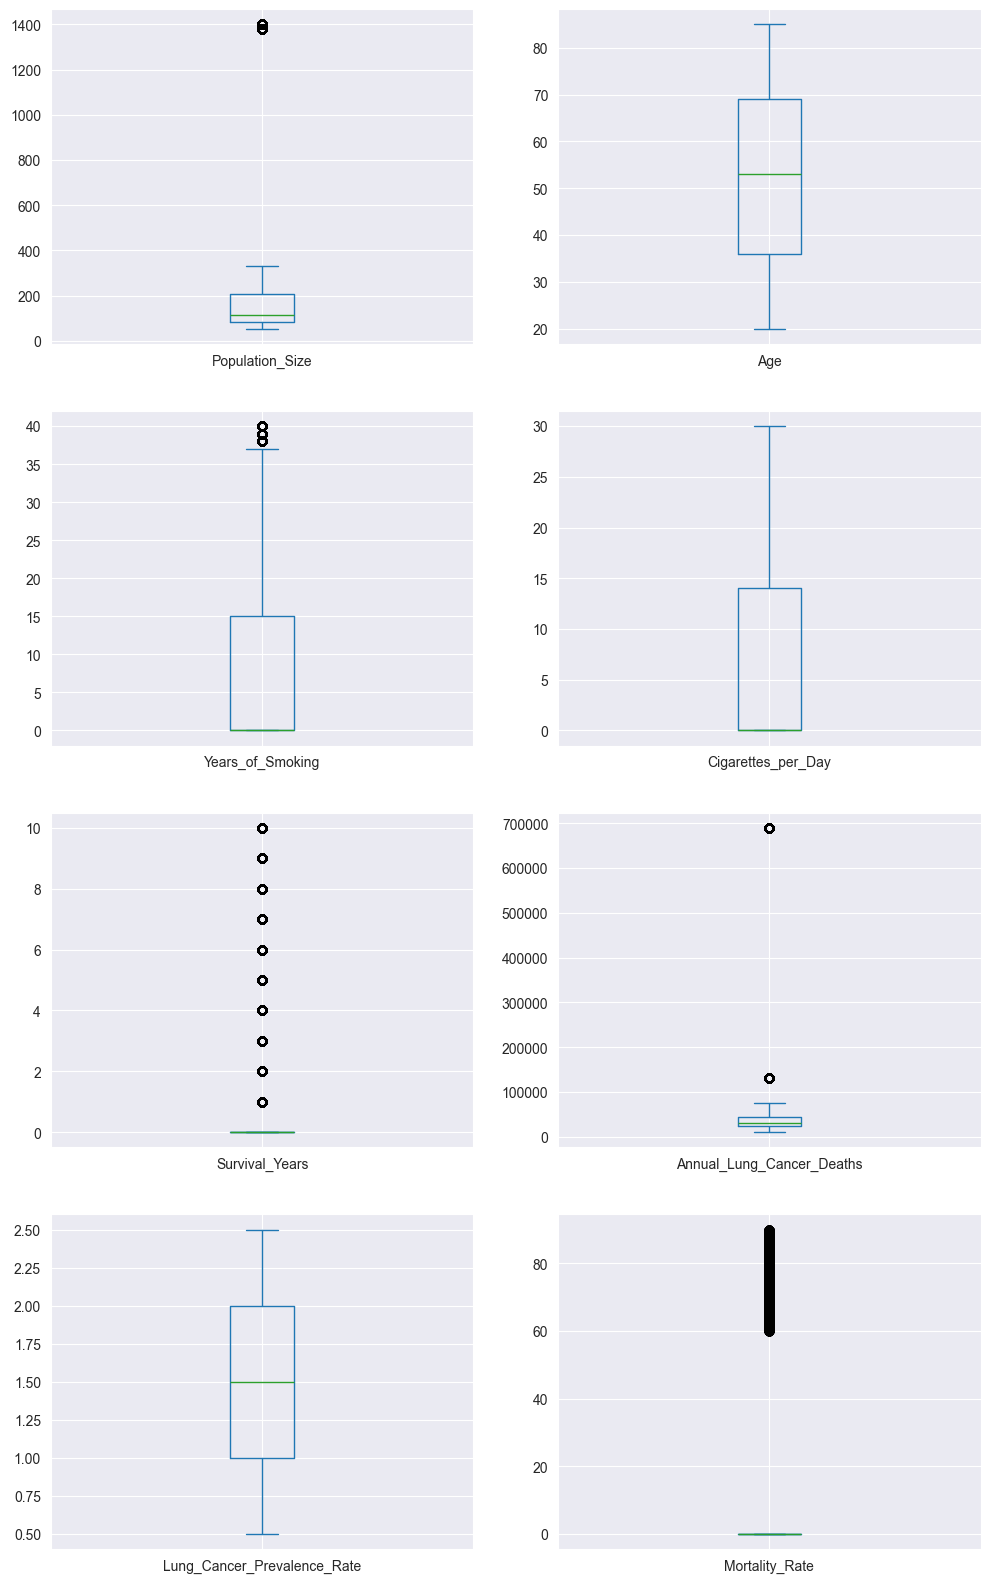

In [160]:
df.drop(columns=["ID"]).plot(kind="box", figsize=(12, 20), subplots=True, layout=(4, 2))

Observamos nos gráficos acima algumas questões:
- `Population_Size` tem outliers muito altos. Além disso, o desvio padrão é muito alto, indicando dados dispersos
- `Years_of_Smoking` possui mediana `0`, o que significa que a maioria das pessoas não fuma. Também possui um desvio padrão muito alto, indicando dados dispersos
- `Cigarettes_per_Day` segue o mesmo comportamento de `Years_of_Smoking`
- `Survival_Years` indica que a maioria dos casos observados não sobrevive após o diagnóstico, o que não parece correto. Iremos explorar mais logo abaixo
- `Annual_Lung_Cancer_Deaths` tem o desvio padrão alto, indicando dados dispersos. Devemos normalizar esses dados, talvez calculando seu valor por 1000 habitantes, na fase de preparo dos dados
- `Mortality_Rate` a maioria dos casos tem mortalidade zero, mas há outliers com mortalidade muito alta. Também podemos considerar a taxa de mortalidade por 1000 habitantes durante a fase de preparo dos dados

Vamos entender melhor o conteúdo de `Survival_Years`:

In [161]:
df.groupby("Lung_Cancer_Diagnosis")["Survival_Years"].value_counts()

Lung_Cancer_Diagnosis  Survival_Years
No                     0                 211671
Yes                    10                   925
                       6                    924
                       5                    922
                       1                    905
                       7                    896
                       2                    888
                       4                    888
                       3                    873
                       8                    871
                       9                    869
Name: count, dtype: int64

Nesse caso, apenas os diagnósticos negativos estão com o valor zerado. Vamos recriar o gráfico apenas para os casos em que o diagnóstico é positivo para entender melhor a distribuição dos seus valores: 

<Axes: >

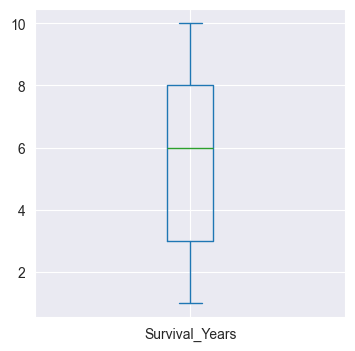

In [162]:
df.where(df["Lung_Cancer_Diagnosis"] == "Yes")["Survival_Years"].plot(kind="box", figsize=(4, 4))

Vamos observar a distribuição de algumas colunas, mas para isso vamos converter os dados em uma escala comum para facilitar a análise já que as colunas são muito diferentes entre si:

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

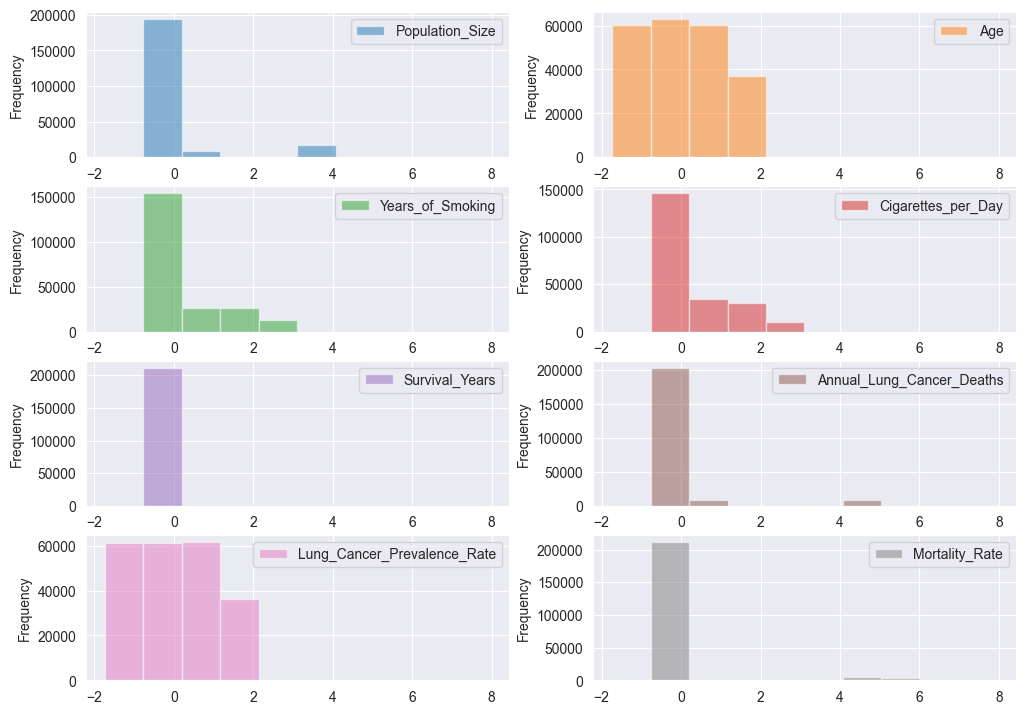

In [163]:
from sklearn.preprocessing import StandardScaler

number_df = df.drop(columns="ID").select_dtypes(include=["int", "float"])
scaled_array = StandardScaler().fit_transform(number_df)

standardized_df = pd.DataFrame(scaled_array, columns=number_df.columns, index=df.index)
standardized_df.plot(kind="hist", alpha=0.5, figsize=(12, 20), subplots=True, layout=(9, 2), sharex=False, sharey=False)


# @todo análisar gráficos acima

Agora vamos olhar a incidência da coluna target para as variáveis categóricas para entender melhor sua consistência e utilidade:

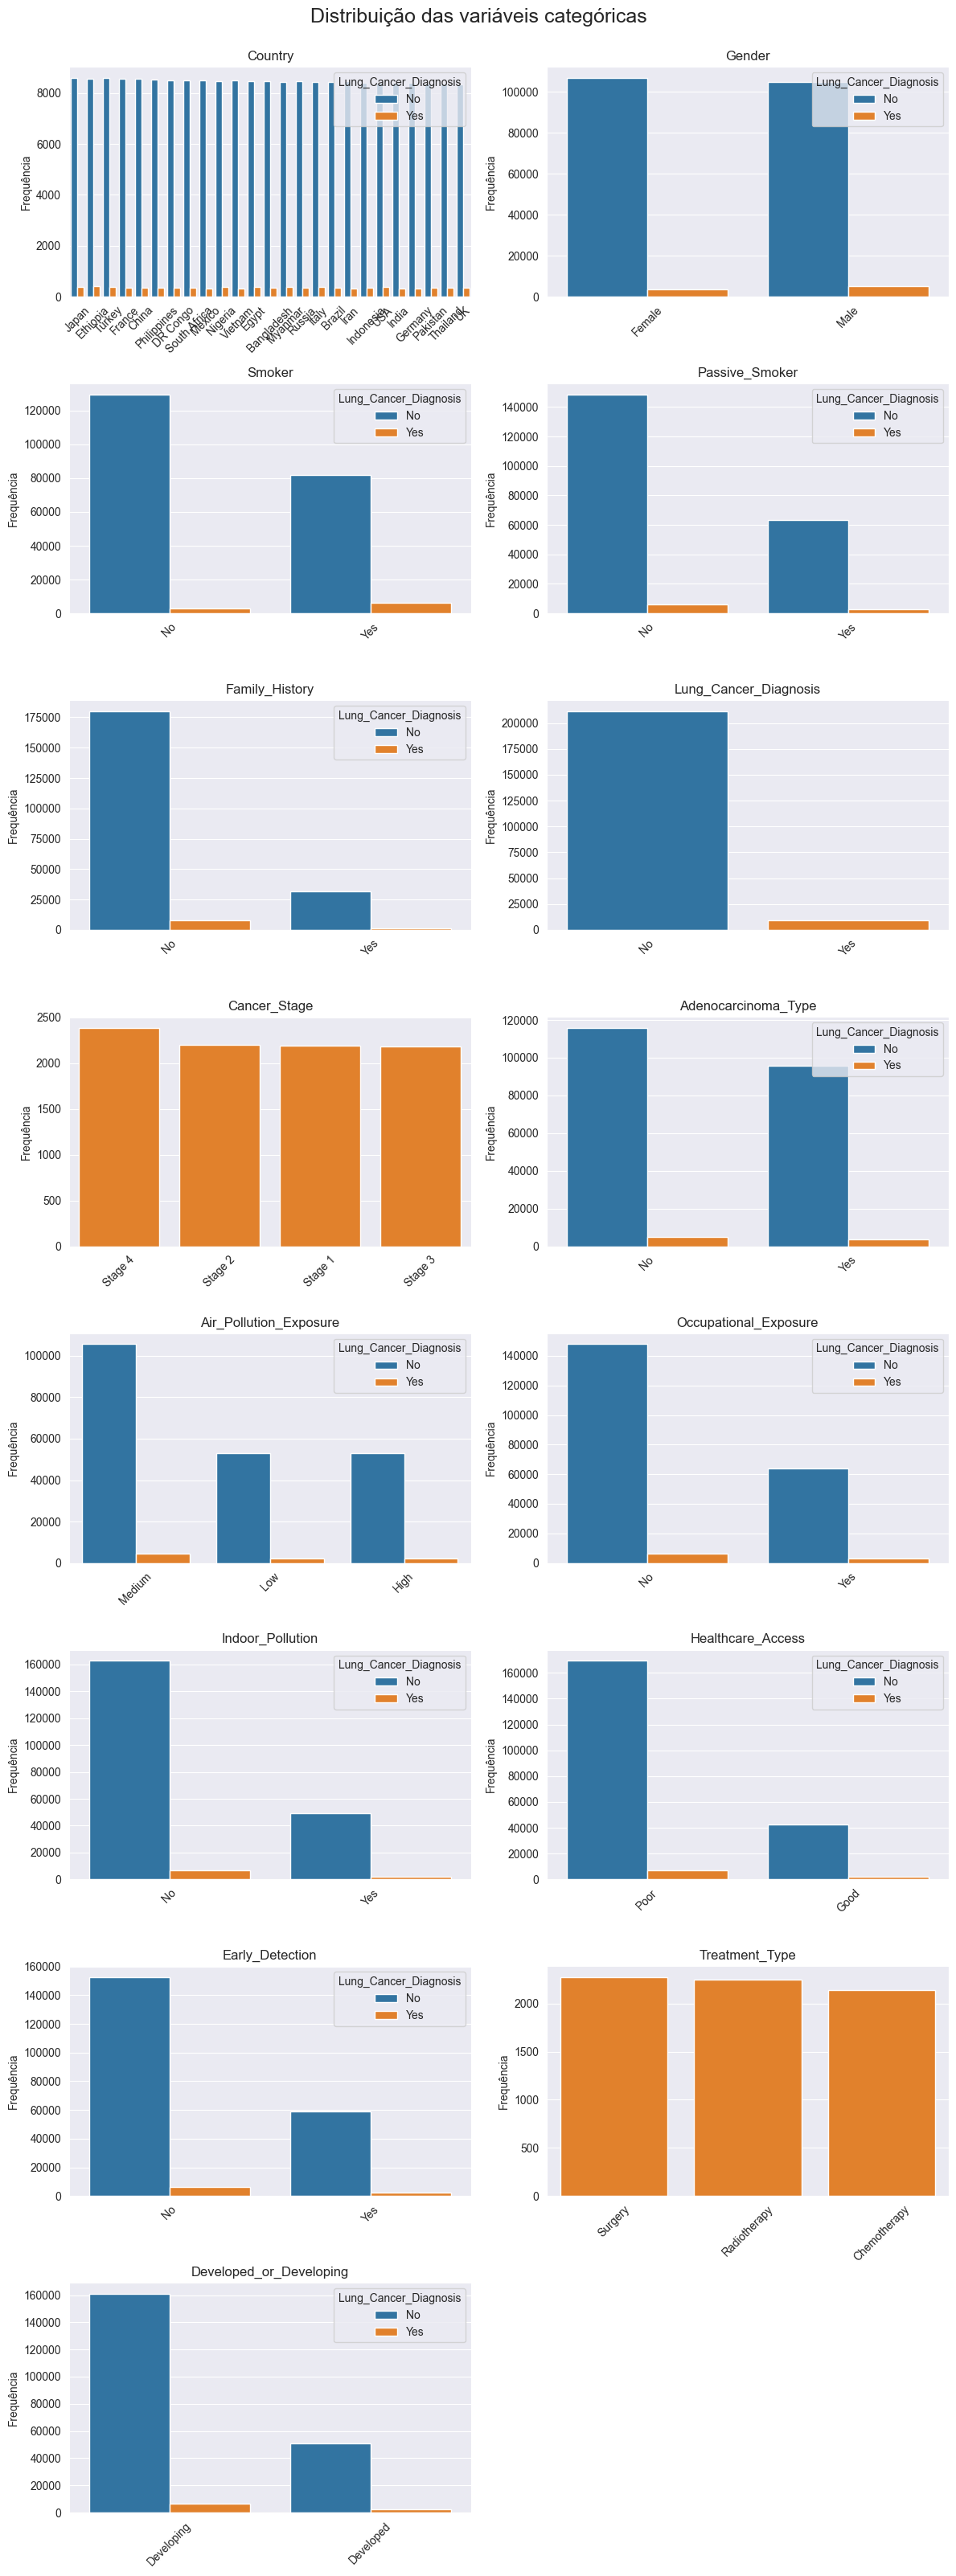

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = df.select_dtypes(include="object").columns.tolist()

plt.figure(figsize=(12, 32))

for index, column in enumerate(categorical_columns, 1):
    plt.subplot(8, 2, index)

    sns.countplot(data=df, x=column, order=df[column].value_counts().index, hue="Lung_Cancer_Diagnosis")

    plt.title(column)
    plt.xlabel("")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)

    if column in ["Cancer_Stage", "Treatment_Type"]: # remove hue on column that always represents a cancer case 
        plt.gca().get_legend().remove()

plt.suptitle("Distribuição das variáveis categóricas", fontsize=18, y=1)
plt.tight_layout()
plt.show()

# @todo DESCREVER DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS
# @todo CORRELAÇÃO